**КУРСОВАЯ РАБОТА**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
url='https://github.com/MaxTime11/course/blob/main/corse.xlsx?raw=true'
df=pd.read_excel(url)



In [44]:
df.head()

,x,y
0,200,7.42
1,250,6.98
2,255,6.94
3,300,6.54
4,380,5.86


**Аппроксимция методом МНК**

Зная характер функциональной зависимости y=kx+b, подберем коэффициенты k и b таким образом, чтобы наилучшим образом описать экспериментальные данные


In [45]:
x=df['x']
y=df['y']
N=len(x)

In [46]:
xx = x.sum()/N
yy = y.sum()/N

k = sum((x - xx)*(y - yy))/sum((x-xx)**2)
b = yy - k*xx
f = k*x+b
f.info()


<class 'pandas.core.series.Series'>
RangeIndex: 21 entries, 0 to 20
Series name: x
Non-Null Count  Dtype  
--------------  -----  
21 non-null     float64
dtypes: float64(1)
memory usage: 296.0 bytes


Построение графика полученной аппроксимирующей функции

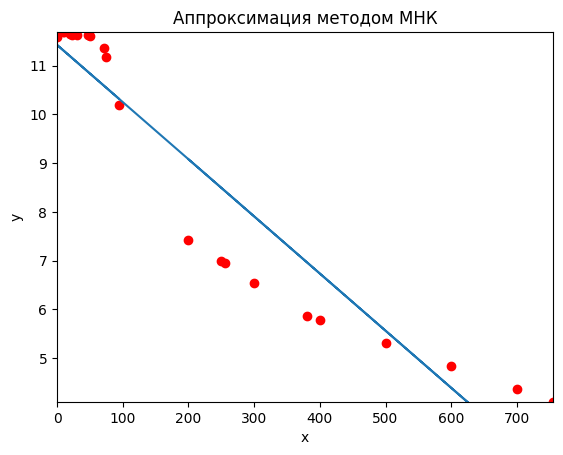

In [49]:
plt.scatter(x, y, c='red')
plt.title('Аппроксимация методом МНК')
plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,f)
plt.show()

МНК позволяет описать эксперементальные данные, имеющие некоторые разброс в значениях в силу погрешностей приборов или других погрешностей

**ИНТЕРПОЛЯЦИОННЫЙ МНОГОЧЛЕН ЛАГРАНЖА**

In [50]:
url='https://github.com/MaxTime11/course/blob/main/lagrange.xlsx?raw=true'
df_=pd.read_excel(url)
df_.head()

,X,Y
0,233.0,0
1,232.5,8
2,232.8,10
3,234.1,19
4,234.0,20


In [51]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       27 non-null     float64
 1   Y       29 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


Удалим пропущенные строки. Также можно заполнить средним арифметическим, медианой, модой и тд,а затем стандартизировать данные. Указание True запрещает pandas сохранять исходный индекс в виде столбца в df_

In [52]:
df_ = df_.dropna()
df_ = df_.reset_index(drop=True)

Построим многочлен лагранжа

In [53]:
x = df_['Y']
y = df_['X']

import numpy as np
x_ = np.linspace(x.min(), x.max(), 60)
N = len(x)
N_ = len(x_)
y_= np.zeros(N_)

for n in range(N_):
    s = 0
    for i in range(N):
        p = 1
        for j in range(N):
            if i != j:
                p = (x_[n] - x[j]) / (x[i] - x[j])*p
        s = s+ y[i] * p
    y_[n] = s

Построим график полинома

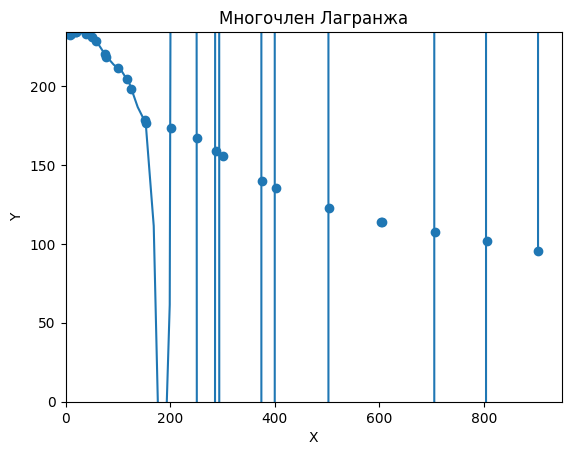

In [55]:
plt.scatter(x, y)
plt.plot(x_, y_)
plt.title('Многочлен Лагранжа')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0)
plt.ylim(0, y.max())
plt.show()

Многочлен Лагранжа используется как многочлен минимальной степени, принимающий заданные значения в заданном наборе точек, то есть решающий задачу интерполяции

**Таким образом, мы рассмотрели методы, помогающие нам упрощать и решать поставленные практические задачи при анализе предоставленных данных**